In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Q1.Load the dataset into python environment

In [2]:
dt=pd.read_csv(r"C:\Users\HP\Downloads\ICT-DS\titanic_dataset.csv")

In [3]:
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Q3.Check the basic details of the dataset

In [4]:
dt.shape

(891, 12)

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
da=pd.DataFrame(dt)

#### Q2.Make ‘PassengerId’ as the index column

In [7]:
da.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


#### Q4. Fill in all the missing values present in all the columns in the dataset

In [8]:
dt.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
num_cols=da[['Age']]

In [10]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')

In [11]:
imputer = imputer.fit(num_cols)

In [12]:
num_cols=imputer.transform(num_cols)

In [13]:
num_cols=pd.DataFrame(num_cols,columns=['Age'])

In [14]:
type(num_cols)

pandas.core.frame.DataFrame

In [15]:
num_cols.isna().sum()

Age    0
dtype: int64

In [16]:
da.drop(da[['Age','Cabin','Embarked']],axis=1,inplace=True)

In [17]:
da

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


In [18]:
da=pd.concat([num_cols,da],axis=1)

In [19]:
da

,Age,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,22.0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,38.0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,26.0,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,35.0,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,35.0,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...,...
886,27.0,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,19.0,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,28.0,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,26.0,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


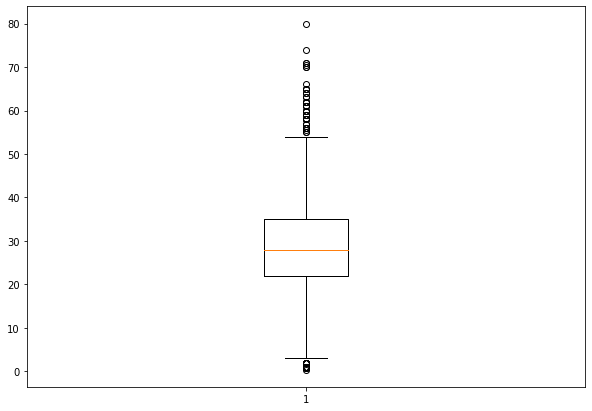

In [20]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(da['Age'])
plt.show()

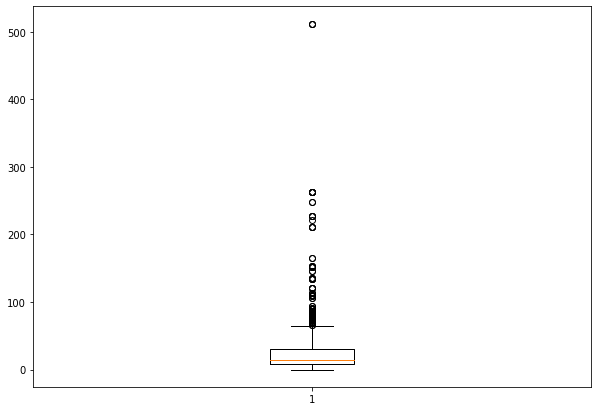

In [21]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(da['Fare'])
plt.show()

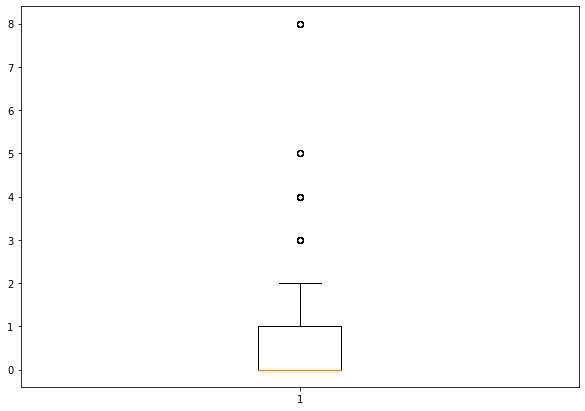

In [23]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(da['SibSp'])
plt.show()

In [24]:
Q1=np.percentile(da['Age'],25)
Q1

22.0

In [25]:
Q2=np.percentile(da['Age'],50)
Q2

28.0

In [26]:
Q3=np.percentile(da['Age'],75)
Q3

35.0

In [27]:
IQR=Q3-Q1
IQR

13.0

In [28]:
ll=Q1-1.5*IQR
up=Q3+1.5*IQR

In [32]:
print(ll)
print(up)

2.5
54.5


In [37]:
outliers=[]
for x in da['Age']:
    if ((x>up) or (x<ll)):
        outliers.append(x)
outliers

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [38]:
ind=da['Age']>up
da.loc[ind].index

Int64Index([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879],
           dtype='int64')

In [40]:
da.drop([11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879],inplace=True)

In [42]:
da.shape

(849, 10)

In [43]:
Q1=np.percentile(da['Fare'],25)
Q3=np.percentile(da['Fare'],75)
IQR=Q3-Q1
ll=Q1-1.5*IQR
up=Q3+1.5*IQR
outliers=[]
for x in da['Fare']:
    if ((x>up) or (x<ll)):
        outliers.append(x)
outliers

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 83.1583,
 69.55,
 89.1042,
 164.8667,
 69.55]

In [ ]:
da.drop([71.2833,263.0,146.5208,82.1708,76.7292,80.0,83.475,73.5,263.0,77.2875,247.5208,73.5,77.2875,79.2,66.6,69.55,69.55,69.55,113.275,76.2917,90.0,83.475,90.0,79.2,86.5,512.3292,79.65,135.6333,78.85,91.0792,151.55,247.5208,151.55,110.8833,108.9,83.1583,262.375,164.8667,134.5,69.55,135.6333,153.4625,133.65,66.6,134.5,263.0,69.3,135.6333,82.1708,211.5,227.525,73.5,120.0,113.275,90.0,120.0,81.8583,89.1042,91.0792,90.0,78.2667,151.55,86.5,108.9,93.5,221.7792,106.425,71.0,106.425,110.8833,227.525,79.65,110.8833,79.65, 78.2667, 153.4625,65.0,77.9583,69.3,76.7292,73.5,133.65,73.5,512.3292,76.7292,211.3375,110.8833,227.525,151.55,227.525,211.3375,512.3292,78.85,262.375,65.0,86.5,120.0,77.9583,211.3375,79.2,69.55,120.0,93.5,83.1583,69.55,89.1042,164.8667,69.55],inplace=True)

In [48]:
Q1=np.percentile(da['SibSp'],25)
Q3=np.percentile(da['SibSp'],75)
IQR=Q3-Q1
ll=Q1-1.5*IQR
up=Q3+1.5*IQR
outliers=[]
for x in da['SibSp']:
    if ((x>up) or (x<ll)):
        outliers.append(x)
print(outliers)

[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]


In [49]:
da.drop([3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8],inplace=True)

In [51]:
da.shape

(845, 10)

In [65]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
da['Name']=label_encoder.fit_transform(da['Name'])

In [66]:
da['Sex']=label_encoder.fit_transform(da['Sex'])

In [67]:
x=da.drop('Survived',axis=1)

In [68]:
y=da['Survived']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(0,1))
x1=min_max.fit_tranform(x)